# 가설 증명 / TEST

# 카이제곱 검정 
: 두 범주형(category) 변수가 서로 상관이 있는지 판단하는 통계적 검정 방법. <br>
예) 학력, 성별, 직업의 만족도(매우나쁨 (1)~ 매우좋음(5)) 

### 아동별 장난감 보유 현황
- 귀무가설 (당연한 것, 분석할 가치가 없는것) : child 1과 child2의 장난감 보유수에 대한 만족도는 차이가 없다.
- 대립가설 (분석할 것) : child1과 child2의 장난감 보유수에 대한 만독도는 차이가 있다.

In [1]:
# child 별 장난감 보유 현황 데이터
child1 <- c(5,11,1)
child2 <- c(4,7,3)

#분석을 위해 데이터 합치기
Toy <- cbind(child1,child2)
rownames(Toy) <- c("car","truck","doll")
Toy

child1 child2
car    5     4     
truck 11     7     
doll   1     3

In [2]:
# 카이제곱 검정 실시 
chisq.test(Toy)
# 해석 p-value 가 중요하다
cor(child1, child2) # 98퍼 : child1,2가 쌍둥이처럼 비슷한 데이터다. 분석할 이유가 없음

Warning message in chisq.test(Toy):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  Toy
X-squared = 1.7258, df = 2, p-value = 0.4219


[1] 0.9862414

### 결론
p-value = 0.4219 > 0.05(95% 신뢰구간) -> 귀무가설을 기각할 수 없음 , 대립가설을 체택할 수 없음 <br>
= 데이터의 40%가 사용할 수 없다 : 못 쓰는 데이터다 
> child1과 child2의 데이터는 통계적으로 큰 차이가 없다.

p-value는 0에 가까울수록 좋다. 미리 정해진 유의수준(일반적으로 0.05) 보다 작으면 대립가설을 체택하고 유의수준보다 크면 귀무가설을 체택한다.

### Warning 메세지 : 카이제곱의 근사값이 정확하지 않을 수도 있다.
- 데이터량이 적은 경우 발생

# 피셔검정
데이터 갯수가 적을때 사용

In [3]:
fisher.test(Toy)

# p-value = 0.5165 > 0.05 --> 귀무가설


	Fisher's Exact Test for Count Data

data:  Toy
p-value = 0.5165
alternative hypothesis: two.sided


---
# t - 검정
소비자원 <br>
예) 광고 '배터리 타임 1000시간(평균값)' , 소비자 '배터리 타임 ? '
퀄리티를 일정하게 뽑는 양산기술이 있는지 판단하는데 사용

In [4]:
# 귀무가설 : 건전지 수명은 1000시간이다.
# 대립가설 : 건전지의 수명은 1000시간이 아니다.

In [5]:
bat <- c(980, 1008, 968, 1032, 1012, 1002, 996, 1017)

# 데이터의 분포가 정규분포인지 확인한다 (진짜 확실한 데이터인지 확인한다) ---> Shapiro-Wilk 검정을 실시 @중요** 정규분포인지 꼭 확인해야한다
# 귀무/대립이 정해져 있음
# 귀무가설 : 자료가 정규분포를 따른다
# 대립가설 : 자료가 정규분포를 따르지 않는다

shapiro.test(bat)
# p-value = 0.9758 > 0.05 ---> 귀무가설

# t - 검정 실시
t.test(bat, mu = 1000, alternative = "two.sided")

## t.test 옵션
# mu : 비교하는 대상의 평균
# alternative - two.sided : 데이터가 평균에 따른다
# alternative - greater : 데이터가 평균보다 크다
# alternative - less : 데이터가 평균보다 작다

# p-value = 0.8032 > 0.05 ---> 귀무가설: 건전지의 수명은 1000시간이다.
# 현재 데이터의 평균 1001.875
# 95% 신뢰구간 984.7508 ~ 1018.9992



	Shapiro-Wilk normality test

data:  bat
W = 0.97706, p-value = 0.9469



	One Sample t-test

data:  bat
t = 0.25891, df = 7, p-value = 0.8032
alternative hypothesis: true mean is not equal to 1000
95 percent confidence interval:
  984.7508 1018.9992
sample estimates:
mean of x 
 1001.875 


> 5/4 끗

In [9]:
# exam 데이터셋 
# 어떤 학급의 수학 점수 평균 : 55점
# 0교시 수업을 한 후에 학생들의 성적이 올랐을까?
# 귀무가설: 성적은 오르지 않았다
# 대립가설: 성적이 올랐다
exam <- read.csv("../Data/exam.csv")
head(exam)
tail(exam)
str(exam)
summary(exam)

no score
1 1  58   
2 2  49   
3 3  39   
4 4  99   
5 5  32   
6 6  88

no score
12 12 55   
13 13 57   
14 14 53   
15 15 88   
16 16 42   
17 17 39

'data.frame':	17 obs. of  2 variables:
 $ no   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ score: int  58 49 39 99 32 88 62 30 55 65 ...


       no         score      
 Min.   : 1   Min.   :30.00  
 1st Qu.: 5   1st Qu.:42.00  
 Median : 9   Median :55.00  
 Mean   : 9   Mean   :56.18  
 3rd Qu.:13   3rd Qu.:62.00  
 Max.   :17   Max.   :99.00  


	Shapiro-Wilk normality test

data:  exam$score
W = 0.91143, p-value = 0.1058



	One Sample t-test

data:  exam$score
t = 0.24546, df = 16, p-value = 0.4046
alternative hypothesis: true mean is greater than 55
95 percent confidence interval:
 47.80855      Inf
sample estimates:
mean of x 
 56.17647 


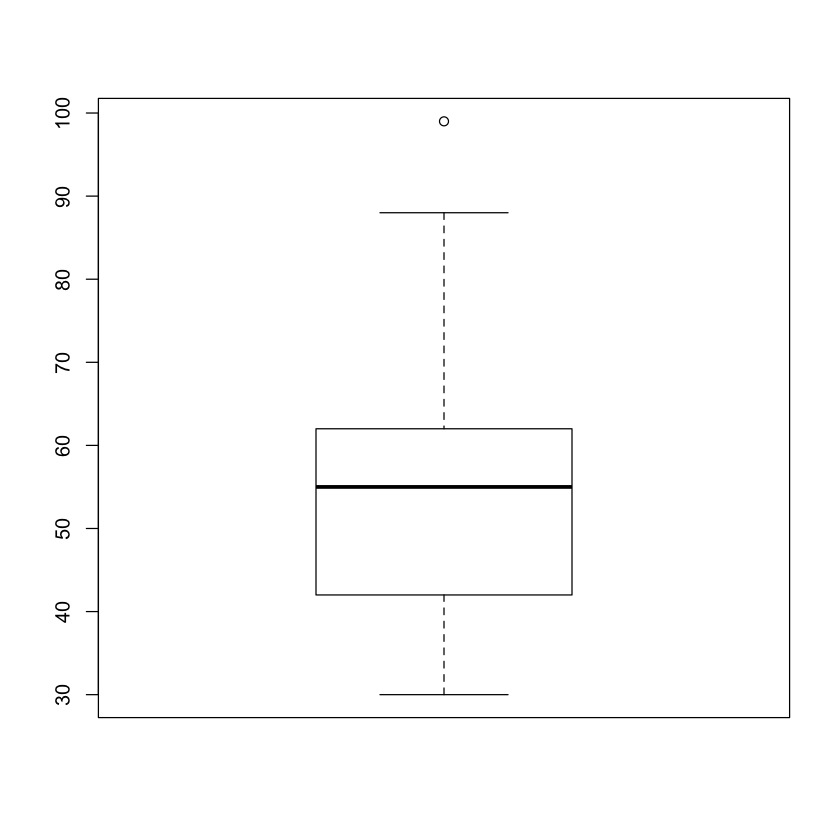

In [13]:
shapiro.test(exam$score)
# p-value = 0.1058 > 0.05 ---> 귀무가설 : 정규분포

t.test(exam$score , mu = 55, alternative = "greater")
# p-value = 0.4046 > 0.05 ---> 귀무가설 ?

# 0교시 수업을 해도 수학 성적은 오르지 않았다
# 평균은 올랐다
# 왜? ; 99점 특이치를 제거하지 않고 통계를 내서 그렇다 @ 통계는 수학과 다르다 @  

boxplot(exam$score) # 특이치 하나가 있다 

In [21]:
# 표본이 2개인 t 검정
# 제약회사
# 귀무가설 : 복용 전 후의 차이가 없다
# 대립가설 : 복용 전 후의 차이가 있다

postMedicine <- read.csv("../Data/postMedicine.csv")
preMedicine <- read.csv("../Data/preMedicine.csv")

post <- postMedicine$data
pre <- preMedicine$data


In [24]:
t.test(pre, post, alternative= "two.sided" )
# p-value = 0.7165 > 0.05 ---> 귀무가설 : 약효가 없다
# 평균을 보면 효과가 있어 보인다. 통계 데이터는 절대 순서를 바꾸면 안된다. 


	Welch Two Sample t-test

data:  pre and post
t = -0.36891, df = 17.987, p-value = 0.7165
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.745046  1.925046
sample estimates:
mean of x mean of y 
    10.63     11.04 


---
# 상관계수
순서중요*

In [25]:
y <- c(1,2,3,4)
z <- c(0,5,7,9)
cor(y,z) # y, z 순서에 따라 상관계수값이 바뀐다.

[1] 0.9693631

In [26]:
# 피어슨 상관계수 
cor(y, z , method = "pearson") # default 값이 피어슨방식 이다. 

[1] 0.9693631

In [27]:
# 스피어맨 상관계수
cor(y,z , method = "spearman") # 데이터가 5개가 넘지 않으면 스피어맨을 사용해야 한다.
# y,z 분석에서 적합한 상관계수 값은 스피어맨 방식이다.

[1] 1

---

## 콜모고로프-스미노프 검정( KS Test)
: 주어진 2개의 데이터가 같은 분포를 이루는지 검정하는 것

In [28]:
# 귀무가설 : 두개의 데이터의 분포가 다르다.
# 대림가설 : 두개의 데이터의 분포가 같다
# 가설은 고정

In [30]:
x <- rnorm(50) # 정규분포 만드는 함수
y <- runif(50)

ks.test(x,y)

# 0.001315 < 0.05 ---> 대립가설 : runif 데이터도 정규분포를 이룬다



	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.52, p-value = 1.581e-06
alternative hypothesis: two-sided


---
## 부호검정
: 2개의 데이터 사이에 차이가 있는지 검정하는 것

In [32]:
# 식사전과 식사 후의 음료수 맛에 대한 평가
x <- c(4,1,1,4,3,3,2,5,3,3) # 식사전의 음료수 맛에 대한 평가 점수
y <- c(1,1,3,2,5,1,4,4,3,1) # 식사후의 음료수 맛에 대한 평가 점수

# 귀무가설 : 유의한 차이가 없다.
# 대립가설 : 유의한 차이가 있다.

ERROR: Error in round(x): 수학함수에 숫자가 아닌 인자가 전달되었습니다


In [34]:
binom.test(c(length(x[x>y]),length(x[x<y])))
# p-value = 0.7266 ---> 귀무가설 


	Exact binomial test

data:  c(length(x[x > y]), length(x[x < y]))
number of successes = 5, number of trials = 8, p-value = 0.7266
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.2448632 0.9147666
sample estimates:
probability of success 
                 0.625 


In [33]:
length(x[x>y])
length(x[x<y])

[1] 5

[1] 3

---
## 비율 검정
: 2개의 데이터 사이에 비율의 차이가 있는지에 대한 것을 검정

In [35]:
# 맥주를 좋아하시나요? 라는 질문에 서울에서는 400명 중 360명, 부산에서는 200명 중 136명이 좋아한다고 답했다면 
# 둘의 비율의 차이가 있다고 할 수 있는가?
# 선거때 많이 사용

# 귀무가설 : 유의한 차이가 없다. 
# 대립가설 : 유의한 차이가 있다.

hite <- c(360, 136)
sample <- c(400, 200)

prop.test(hite, sample)

# p-value = 4.207e-11 < 0.05 ---> 대립가설 : 유의한 차이가 있다 
# 지역별로 맥주 맛을 다르게 한다 


	2-sample test for equality of proportions with continuity correction

data:  hite out of sample
X-squared = 43.515, df = 1, p-value = 4.207e-11
alternative hypothesis: two.sided
95 percent confidence interval:
 0.14523 0.29477
sample estimates:
prop 1 prop 2 
  0.90   0.68 


> 끗